<a href="https://colab.research.google.com/github/tgallach/8-23-19/blob/master/ass%2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import choice
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:

#1. Fisher's Test

In [66]:
# fill in you data
data = np.matrix( [[32,18],[11,19]])
print(data)

[[32 18]
 [11 19]]


In [67]:
#If her responses were completely random, what was the probability to obtain the given table?
# save your answer into =ptable= variable 

data.sum()

80

In [68]:
data.sum(axis=0)

matrix([[43, 37]])

In [69]:
data.sum(axis = 1)

matrix([[50],
        [30]])

In [70]:
import numpy as np 
from scipy.stats import fisher_exact
from scipy.stats import hypergeom


X =hypergeom(80,43,50)
vals = range(0,44)
probs = X.pmf(vals)
probs[ probs<=X.pmf(32)].sum()

0.021828691306254516

In [0]:
ptable = 0.021828691306254516

In [72]:
# Use two-sided exact test to check for statistical significance.
# Calculate p-value and save it into variable pval

import numpy as np 
from scipy.stats import fisher_exact
data = np.matrix( [[33,17],[9,21]])
_, pval = fisher_exact(data,alternative="two-sided")
print(pval)

0.002557332608682513


In [0]:
pval = 0.002557332608682513

In [0]:
#2. Bootsrap Confidence Interval

In [0]:
# TODO: load the file "tennis2.csv"
# !pip install scikits.bootstrap

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import t
from scipy.stats import binom
from numpy.random import choice
import numpy as np 

## create a binomial random variable
X = binom(n=20,p=0.5)

randomsample = X.rvs(20) #generate a sample from X
randomsample

PATH = ("http://optimizizer.com/data/tennis2.csv")
speed = pd.read_csv(PATH)


In [114]:
# TODO: display the first rows
speed.head()

,speed1,speed2
0,68.20,61.50
1,82.72,73.55
2,72.45,81.49
3,76.55,73.92
4,77.25,82.60


In [115]:
# TODO: select the column speed1 and save it into the variable "speed1"
speed1 = speed.speed1
speed1.head()

0    68.20
1    82.72
2    72.45
3    76.55
4    77.25
Name: speed1, dtype: float64

In [116]:
# TODO: select the column speed2 and save it into the variable "speed2"
speed2 = speed.speed2
speed2.head()

0    61.50
1    73.55
2    81.49
3    73.92
4    82.60
Name: speed2, dtype: float64

In [117]:
# TODO: create a new vector =diff= that shows the differences 
# of the measurements produced by the two systems.
diff = np.mean(speed1) - np.mean(speed2)
diff

-1.8060000000000116

In [0]:
# fix the following code by replacing the question marks 
# You code should collect average difference 
# for different bootstrap samples


np.random.seed(777) # set random seed (don't change this!)
B = 10000 # number of bootstrap sample (don't change this!)
bootstrapmeans = []

for i in range(B):
    bootsample = choice(randomsample, size=len(randomsample), replace=True)
    bootstrapmeans.append(bootsample.mean()) 
    i = i

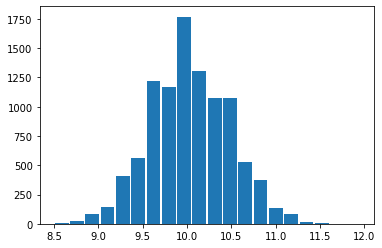

In [120]:
# plot the histogram of bootsraped average diffs
_ = plt.hist(bootstrapmeans,rwidth=0.9,bins=20)

In [122]:
# calculate the confidence interval 
L,U = np.percentile(bootstrapmeans, [0.025,0.975])
print("\n bootstrap (perc) CI:",L,U,",  while the average observed difference is ",diff)


 bootstrap (perc) CI: 8.6 9.0 ,  while the average observed difference is  -1.8060000000000116
